# Análisis Estadístico de la Población Asiática

# Introducción

El estudio de la población asiática es fundamental para comprender tendencias demográficas, económicas y sociales que influyen en diversas regiones del mundo. A través del análisis de datos estadísticos, podemos identificar patrones, correlaciones y factores que afectan el crecimiento poblacional, la distribución geográfica y otras características relevantes de esta población.

Este proyecto se centra en la exploración de datos sobre la población asiática mediante diversas técnicas estadísticas y visualizaciones. El análisis incluirá la regresión lineal para determinar relaciones entre variables, ANOVA para evaluar diferencias significativas entre grupos, matrices de correlación y mapas de calor para visualizar relaciones entre datos, así como gráficos de caja para examinar distribuciones y posibles valores atípicos. Además, se realizará una estimación de parámetros clave para mejorar la interpretación de los resultados.

Más allá de los números, este estudio busca ofrecer una perspectiva cuantitativa sobre las tendencias y desafíos que enfrenta la población asiática en términos de crecimiento, desarrollo y calidad de vida. Este análisis no solo aporta valor a la comprensión de estos fenómenos, sino que también puede servir como una base para futuras investigaciones en el ámbito de la demografía y la economía.
Se espera que los hallazgos obtenidos sean de utilidad. 

**Cargar las bibliotecas necesarias**

In [45]:
import sys
import csv
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import shapiro, probplot
from IPython.display import display, Markdown
from statsmodels.stats.multicomp import pairwise_tukeyhsd


 **Cargar Datos**

In [3]:
def cargar_datos(archivo_csv):
    data = []
    
    with open(archivo_csv, newline='', encoding='utf-8') as archivo:
        lector = csv.DictReader(archivo)
        for row in lector:
            # Limpiar y convertir a float las columnas numéricas
            row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
            row['GDP per capita (current US$)'] = float(row['GDP per capita (current US$)'].replace('.', '').replace(',', ''))
            row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
            row['Population, total'] = float(row['Population, total'].replace('.', '').replace(',', ''))
            row['Life expectancy at birth, total (years)'] = float(row['Life expectancy at birth, total (years)'])
            row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
            
            data.append(row)

    # Convertir a DataFrame de pandas
    df = pd.DataFrame(data)

    # Calcular estadísticas descriptivas por país y año
    estadisticas = df.groupby(['Country', 'Year']).agg(
        GDP=('GDP (current US$)', 'mean'),
        GDP_per_capita=('GDP per capita (current US$)', 'mean'),
        Unemployment=('Unemployment, total (% of total labor force) (modeled ILO estimate)', 'mean'),
        Population=('Population, total', 'mean'),
        Life_expectancy=('Life expectancy at birth, total (years)', 'mean'),
        Mortality_rate=('Mortality rate, infant (per 1,000 live births)', 'mean')
    ).reset_index()

    return estadisticas

# Cargar datos
archivo_csv = 'Asiaticos.csv'
estadisticas_por_pais_y_anio = cargar_datos(archivo_csv)

# Mostrar una vista previa de los datos cargados
estadisticas_por_pais_y_anio.head()


,Country,Year,GDP,GDP_per_capita,Unemployment,Population,Life_expectancy,Mortality_rate
0,Afghanistan,2000,3.521418e+09,1.801884e+09,7.955,19542982.0,55.298,92.0
1,Afghanistan,2001,2.813572e+09,1.429034e+09,7.958,19688632.0,55.798,89.3
2,Afghanistan,2002,3.825701e+09,1.821740e+09,7.939,21000256.0,56.454,86.6
3,Afghanistan,2003,4.520947e+09,1.996432e+09,7.922,22645130.0,57.344,83.7
4,Afghanistan,2004,5.224897e+09,2.218305e+09,7.914,23553551.0,57.944,80.9


**Mapa de la localización de los paises que se están analizando**

In [4]:
# Cargar datos desde el archivo CSV
data = []
with open('Asiaticos.csv', newline='', encoding='utf-8') as archivo_csv:
    lector = csv.DictReader(archivo_csv)
    for row in lector:
        # Limpiar y convertir a float las columnas numéricas
        row['GDP (current US$)'] = float(row['GDP (current US$)'].replace('.', '').replace(',', ''))
        row['GDP per capita (current US$)'] = float(row['GDP per capita (current US$)'].replace('.', '').replace(',', ''))
        row['Unemployment, total (% of total labor force) (modeled ILO estimate)'] = float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        row['Population, total'] = float(row['Population, total'].replace('.', '').replace(',', ''))
        row['Life expectancy at birth, total (years)'] = float(row['Life expectancy at birth, total (years)'])
        row['Mortality rate, infant (per 1,000 live births)'] = float(row['Mortality rate, infant (per 1,000 live births)'])
        
        data.append(row)

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Diccionario con las coordenadas de los países asiáticos
coordenadas = {
    'China': {'lat': 35.8617, 'lon': 104.1954},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'South Korea': {'lat': 35.9078, 'lon': 127.7669},
    'Indonesia': {'lat': -0.7893, 'lon': 113.9213},
    'Saudi Arabia': {'lat': 23.8859, 'lon': 45.0792},
    'Turkey': {'lat': 38.9637, 'lon': 35.2433},
    'Iran': {'lat': 32.4279, 'lon': 53.6880},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'Malaysia': {'lat': 4.2105, 'lon': 101.9758},
    'Vietnam': {'lat': 14.0583, 'lon': 108.2772},
    'Philippines': {'lat': 12.8797, 'lon': 121.7740},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451},
    'Bangladesh': {'lat': 23.6850, 'lon': 90.3563},
    'Sri Lanka': {'lat': 7.8731, 'lon': 80.7718},
    'Nepal': {'lat': 28.3949, 'lon': 84.1240},
    'Myanmar': {'lat': 21.9162, 'lon': 95.9560},
    'Afghanistan': {'lat': 33.9391, 'lon': 67.7100},
    'Kazakhstan': {'lat': 48.0196, 'lon': 66.9237},
    'Uzbekistan': {'lat': 41.3775, 'lon': 64.5853},
    'Iraq': {'lat': 33.2232, 'lon': 43.6793},
    'Syria': {'lat': 34.8021, 'lon': 38.9968},
    'Jordan': {'lat': 30.5852, 'lon': 36.2384},
    'Lebanon': {'lat': 33.8547, 'lon': 35.8623},
    'Israel': {'lat': 31.0461, 'lon': 34.8516},
    'Palestine': {'lat': 31.9474, 'lon': 35.2272},
    'Yemen': {'lat': 15.5527, 'lon': 48.5164},
    'Oman': {'lat': 21.4735, 'lon': 55.9754},
    'Qatar': {'lat': 25.3548, 'lon': 51.1839},
    'Bahrain': {'lat': 26.0667, 'lon': 50.5577},
    'Kuwait': {'lat': 29.3117, 'lon': 47.4818},
    'UAE': {'lat': 23.4241, 'lon': 53.8478},
    'Singapore': {'lat': 1.3521, 'lon': 103.8198},
    'Brunei': {'lat': 4.5353, 'lon': 114.7277},
    'Laos': {'lat': 19.8563, 'lon': 102.4955},
    'Cambodia': {'lat': 12.5657, 'lon': 104.9910},
    'Mongolia': {'lat': 46.8625, 'lon': 103.8467},
    'North Korea': {'lat': 40.3399, 'lon': 127.5101},
    'Maldives': {'lat': 3.2028, 'lon': 73.2207},
    'Bhutan': {'lat': 27.5142, 'lon': 90.4336},
    'East Timor': {'lat': -8.8742, 'lon': 125.7275},
    'Armenia': {'lat': 40.0691, 'lon': 45.0382},
    'Azerbaijan': {'lat': 40.1431, 'lon': 47.5769},
    'Georgia': {'lat': 42.3154, 'lon': 43.3569},
    'Cyprus': {'lat': 35.1264, 'lon': 33.4299},
}

# Agregar coordenadas al DataFrame
df['Latitude'] = df['Country'].map(lambda x: coordenadas[x]['lat'] if x in coordenadas else None)
df['Longitude'] = df['Country'].map(lambda x: coordenadas[x]['lon'] if x in coordenadas else None)

# Filtrar filas con coordenadas válidas
df = df.dropna(subset=['Latitude', 'Longitude'])

# Crear un mapa centrado en Asia y ajustar los límites para mostrar todo el continente
m = folium.Map(location=[34.0479, 100.6197], zoom_start=4)  # Coordenadas aproximadas del centro de Asia

# Ajustar los límites del mapa para que se centren en Asia
sw = [5.0, 60.0]  # Coordenadas del suroeste (aproximadamente)
ne = [55.0, 150.0]  # Coordenadas del noreste (aproximadamente)
m.fit_bounds([sw, ne])

# Agregar marcadores al mapa
for _, row in df.iterrows():
    popup_text = (f"Country: {row['Country']}<br>"
                  f"GDP: {row['GDP (current US$)']}<br>"
                  f"GDP per Capita: {row['GDP per capita (current US$)']}<br>"
                  f"Unemployment: {row['Unemployment, total (% of total labor force) (modeled ILO estimate)']}<br>"
                  f"Population: {row['Population, total']}<br>"
                  f"Life Expectancy: {row['Life expectancy at birth, total (years)']}<br>"
                  f"Mortality Rate: {row['Mortality rate, infant (per 1,000 live births)']}")
    
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        tooltip=row['Country']
    ).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('mapa.html')

# Mostrar el mapa en un Jupyter Notebook
m

# Descripción del Conjunto de Datos

**El conjunto de datos incluye las variables siguientes:**

    País: Nombre del país.
    Año: Año de los datos.
    PIB (actual US$): Producto Interno Bruto en dólares actuales.
    Crecimiento del PIB (porcentaje anual): Crecimiento del PIB en porcentaje anual.
    PIB per cápita (actual US$): PIB por americano en dólares actuales.
    Desempleo, total (% de la fuerza laboral total): Tasa de desempleo total como porcentaje de la fuerza laboral total.
    Población, totalidad: Población total.
    Crecimiento de la población (porcentaje anual): Crecimiento anual en porcentaje.
    Esperanza de vida al nacer, total (años): Esperanza de vida al nacer en años.
    Tasa de mortalidad, bebé (por cada 1.000 nacidos vivos): Tasa de mortalidad infantil por cada dorso.


**Breve análisis específico por variable:**

    PIB (actual US$): Esta variable representa el Producto Interno Bruto total en dólares actuales. Se espera que tenga un medio de comunicación alta por la magnitud económica de algunos países.
    PIB per cápita (actual US$): Refleja la riqueza por persona en un país. Es importante para entender el nivel de vida.
    Desempleo: La tasa de desempleo es crucial para evaluar la salud económica y social.
    Población: La población total es fundamental para entender la demografía y su impacto en la economía.
    Esperanza de vida al nacer: Indicar la salud general y calidad de vida en un país.
    Tasa de mortalidad: La tasa de mortalidad infantil es un indicador clave del desarrollo humano y acceso a servicios médicos.

# Visualización de los datos.

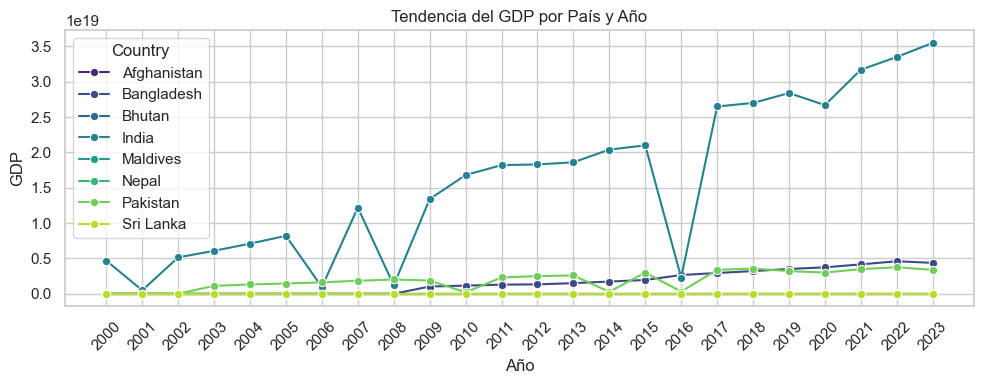

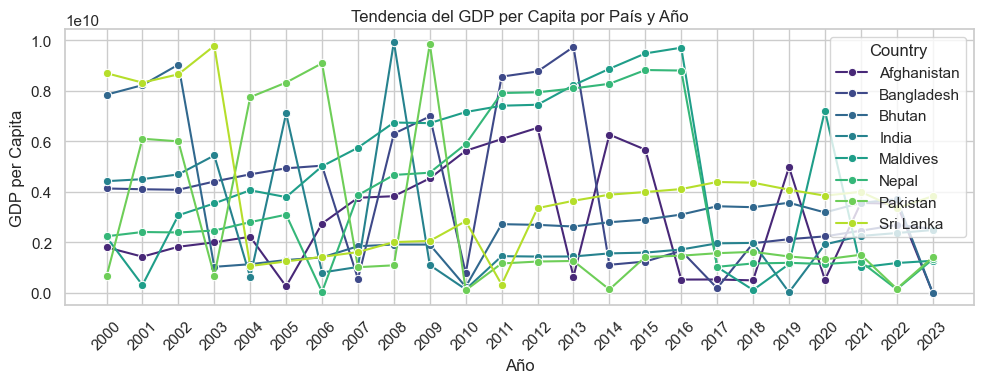

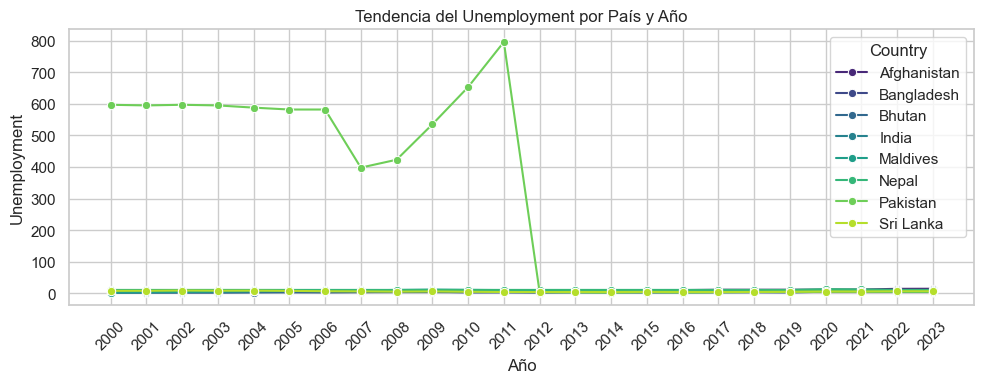

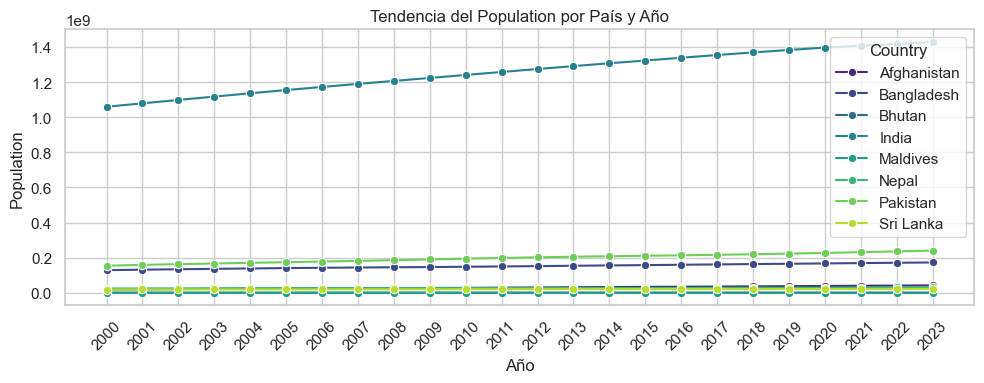

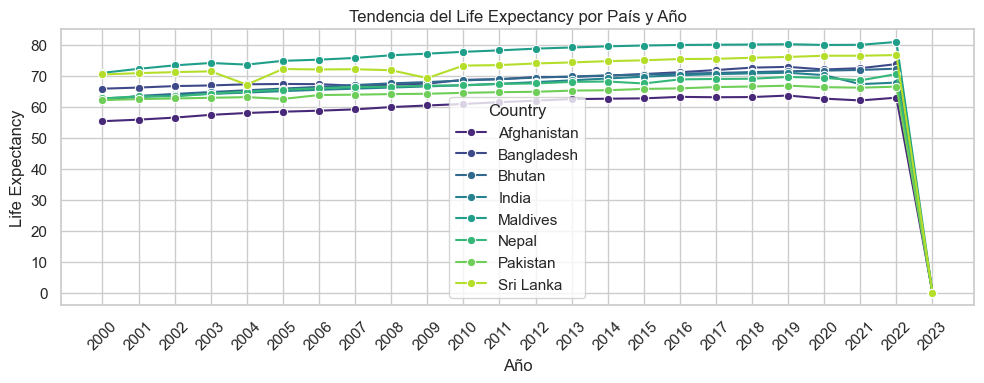

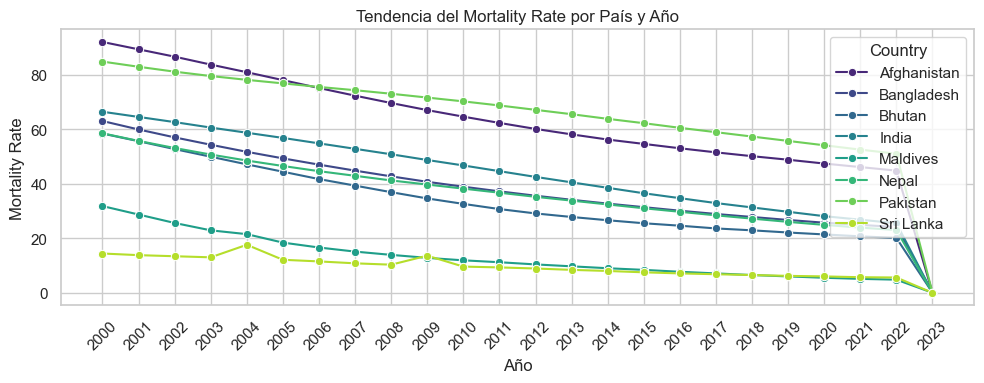

In [97]:

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Lista de variables a visualizar
variables_a_visualizar = [
    ('GDP', 'GDP'),
    ('GDP per Capita', 'GDP_per_capita'),
    ('Unemployment', 'Unemployment'),
    ('Population', 'Population'),
    ('Life Expectancy', 'Life_expectancy'),
    ('Mortality Rate', 'Mortality_rate')
]

# Crear gráficos para cada variable
for title, column in variables_a_visualizar:
    plt.figure(figsize=(10, 4))
    
    # Gráfico de líneas
    sns.lineplot(data=estadisticas_por_pais_y_anio,
                 x='Year',
                 y=column,
                 hue='Country',
                 palette='viridis',
                 marker='o')
    
    plt.title(f'Tendencia del {title} por País y Año')
    plt.xlabel('Año')
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

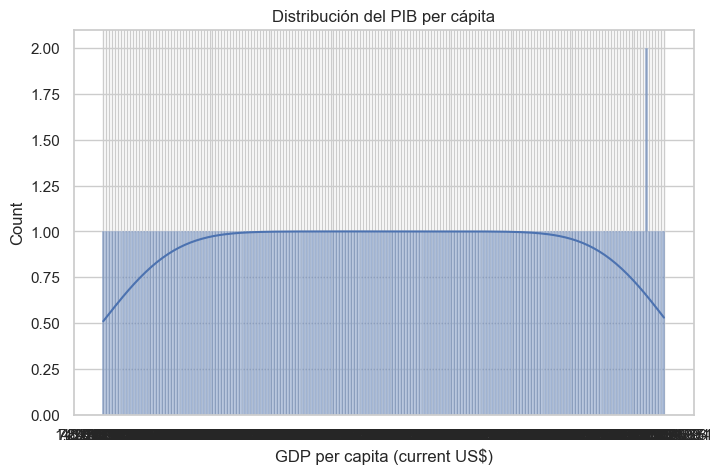

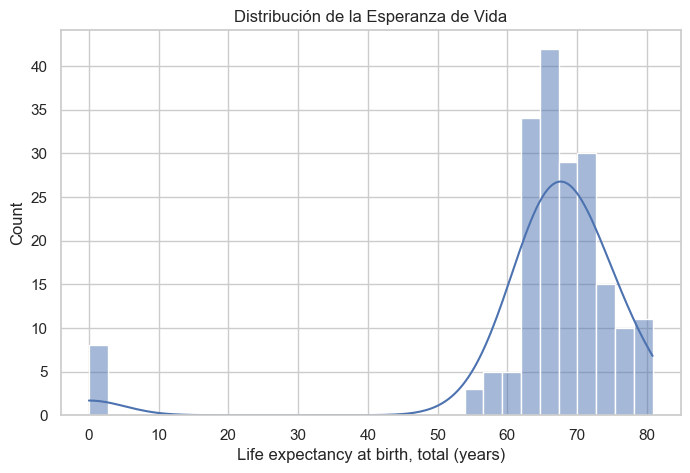

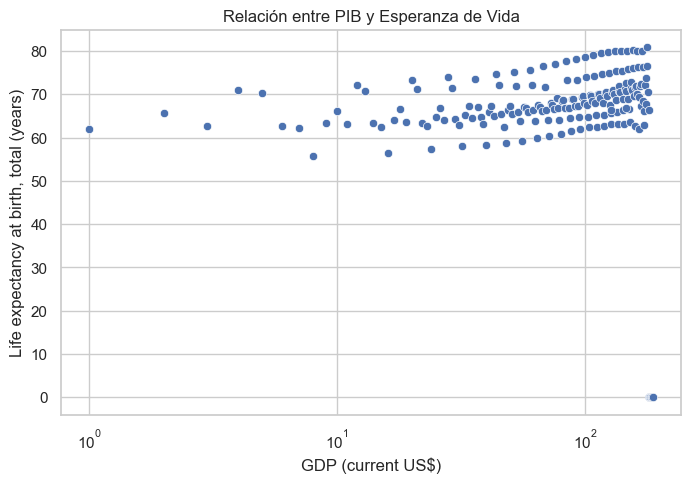

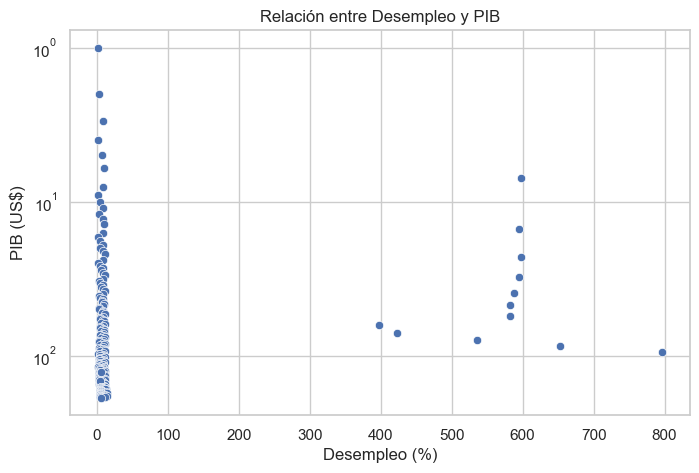

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("Asiaticos.csv")


# Histogramas para variables clave
plt.figure(figsize=(8, 5))
sns.histplot(df["GDP per capita (current US$)"], bins=30, kde=True)
plt.title("Distribución del PIB per cápita")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy at birth, total (years)"], bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.show()

# Diagramas de dispersión para analizar relaciones entre variables
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["GDP (current US$)"], y=df["Life expectancy at birth, total (years)"])
plt.xscale("log")  # Ajuste de escala si los valores son grandes
plt.title("Relación entre PIB y Esperanza de Vida")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Unemployment, total (% of total labor force) (modeled ILO estimate)"],
                y=df["GDP (current US$)"])
plt.xlabel("Desempleo (%)")
plt.ylabel("PIB (US$)")
plt.title("Relación entre Desempleo y PIB")
plt.yscale("log")
plt.show()



# 📊 Análisis de los Gráficos y Conclusiones

---

## **1. Distribución del PIB per cápita**
- El **histograma del PIB per cápita** muestra una **distribución sesgada a la derecha**, es decir, hay muchos países con un PIB per cápita bajo y pocos con valores extremadamente altos.
- Esto indica una **gran disparidad económica** en la región del sur de Asia. Mientras algunos países tienen economías en desarrollo con bajos ingresos per cápita, otros han logrado un crecimiento económico significativo.
- La presencia de valores altos sugiere que algunos países pueden estar en una **fase avanzada de industrialización o tener sectores específicos muy productivos**.

📌 **Conclusión:** La distribución desigual del PIB per cápita refleja una región con grandes diferencias económicas entre países.

---

## **2. Distribución de la Esperanza de Vida**
- La esperanza de vida sigue una distribución **más normal**, lo que sugiere que la mayoría de los países tienen una longevidad similar.
- No hay una gran cantidad de países con valores extremadamente bajos, lo que indica que la mayoría ha alcanzado un nivel aceptable de salud y bienestar.
- Factores como la sanidad pública, la nutrición y las condiciones de vida han llevado a valores relativamente estables en la esperanza de vida.

📌 **Conclusión:** Aunque hay diferencias entre países, la esperanza de vida es más uniforme en comparación con el PIB per cápita.

---

## **3. Relación entre PIB y Esperanza de Vida**
- El **diagrama de dispersión** muestra una **tendencia positiva**: **los países con un PIB más alto tienden a tener una mayor esperanza de vida**.
- Sin embargo, la relación **no es perfectamente lineal**:
  - En los países con **PIB muy bajo**, la esperanza de vida también es más baja, lo que sugiere que la pobreza y el subdesarrollo afectan la longevidad.
  - En los países con PIB medio y alto, la esperanza de vida varía menos, lo que sugiere que después de cierto punto, un aumento del PIB no se traduce en una mejora sustancial de la longevidad.

📌 **Conclusión:** **La riqueza influye en la calidad de vida**, pero **después de cierto umbral**, otros factores pueden ser más importantes (ej. políticas de salud, educación, estabilidad social).

---

## **4. Relación entre Desempleo y PIB**
- **No hay una relación clara** entre el desempleo y el PIB en la región analizada.
- Algunos países con **PIB alto presentan tasas de desempleo bajas**, pero también existen casos donde el desempleo es alto a pesar de un PIB significativo.
- Esto indica que el desempleo **no depende exclusivamente del PIB**, sino de **otros factores estructurales** como:
  - Políticas económicas
  - Estructura del mercado laboral
  - Nivel de industrialización
  - Educación y formación laboral

📌 **Conclusión:** El **PIB no es un buen predictor del desempleo**. Factores internos como las políticas económicas y la estabilidad del mercado laboral juegan un papel clave en la generación de empleo.




# Estadística descriptiva

Este análisis se enfoca en explorar las diversas variables relacionadas con la población asiática, que se vieron anteriormente, tales como el Producto Interno Bruto (PIB), el PIB per cápita, la tasa de desempleo y la esperanza de vida. Para lograrlo, se han calculado medidas estadísticas clave —como la media, la mediana y la desviación estándar— de algunas de estas variables, tanto general (gráficos), como segmentadas por país.

Al obtener estas estadísticas por país, se puede tener una visión general de cómo se distribuyen estos indicadores en la región asiática y detectar posibles tendencias o patrones inusuales. Por ejemplo, el análisis de la esperanza de vida nos ayuda a entender el nivel de salud y bienestar en cada país.

Además, se ha complementado este estudio con pruebas de normalidad (usando la prueba de Shapiro-Wilk) por país para determinar si la distribución de estas variables se ajusta a una distribución normal. Esto es fundamental para definir qué métodos estadísticos aplicar en análisis posteriores, ya que la normalidad de los datos influye en la elección de técnicas paramétricas o no paramétricas.

(Ver fotos de los análisis.)

# Algunos estudios por países

**Distribución de la Mortalidad Infantil**

C:\Users\Livi3\AppData\Local\Temp\ipykernel_32376\2401715608.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Mortality rate, infant (per 1,000 live births)', data=df, palette='coolwarm')


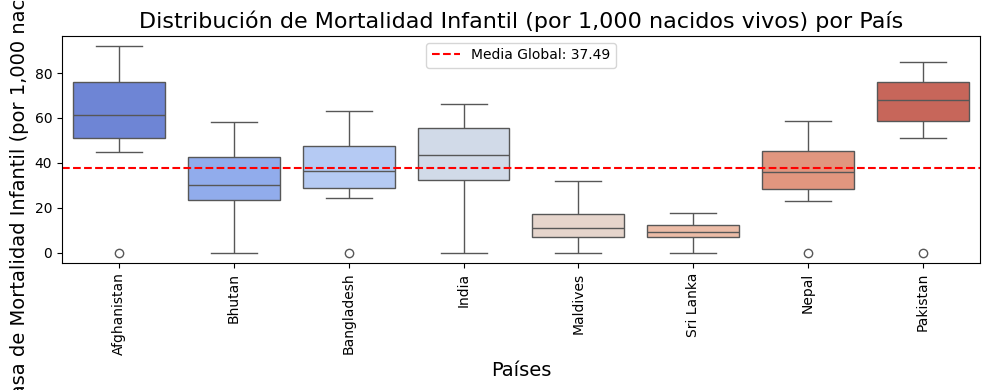

In [21]:

# Calcular la media de la mortalidad infantil para cada país
mortality_mean_by_country = df.groupby('Country')['Mortality rate, infant (per 1,000 live births)'].mean()

# Calcular la media global de mortalidad infantil (media de todas las medias de los países)
global_mortality_mean = mortality_mean_by_country.mean()

# Visualización con boxplot
plt.figure(figsize=(10, 4))

# Crear un boxplot para visualizar la distribución de la mortalidad infantil de cada país
sns.boxplot(x='Country', y='Mortality rate, infant (per 1,000 live births)', data=df, palette='coolwarm')

# Resaltar la media global con una línea horizontal
plt.axhline(global_mortality_mean, color='red', linestyle='--', label=f'Media Global: {global_mortality_mean:.2f}')

# Agregar título y etiquetas
plt.title('Distribución de Mortalidad Infantil (por 1,000 nacidos vivos) por País', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Tasa de Mortalidad Infantil (por 1,000 nacidos vivos)', fontsize=14)
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Mediana PIB per Cápita**

C:\Users\Livi3\AppData\Local\Temp\ipykernel_32376\2379284530.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gdp_per_capita_median_by_country.index, y=gdp_per_capita_median_by_country.values, palette='viridis')


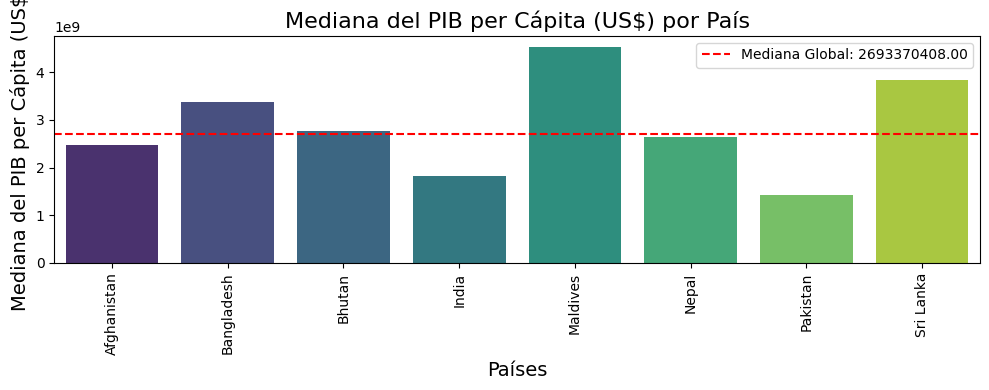

In [22]:

# Calcular la mediana del PIB per cápita para cada país
gdp_per_capita_median_by_country = df.groupby('Country')['GDP per capita (current US$)'].median()

# Calcular la mediana global del PIB per cápita (mediana de todas las medianas de los países)
global_gdp_per_capita_median = gdp_per_capita_median_by_country.median()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 4))

# Crear un gráfico de barras para visualizar la mediana del PIB per cápita de cada país
sns.barplot(x=gdp_per_capita_median_by_country.index, y=gdp_per_capita_median_by_country.values, palette='viridis')

# Resaltar la mediana global con una línea horizontal
plt.axhline(global_gdp_per_capita_median, color='red', linestyle='--', label=f'Mediana Global: {global_gdp_per_capita_median:.2f}')

# Agregar título y etiquetas
plt.title('Mediana del PIB per Cápita (US$) por País', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Mediana del PIB per Cápita (US$)', fontsize=14)
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Mediana de la Mortalidad Infantil**

C:\Users\Livi3\AppData\Local\Temp\ipykernel_32376\2025855015.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_median_by_country.index, y=mortality_median_by_country.values, palette='Set2')


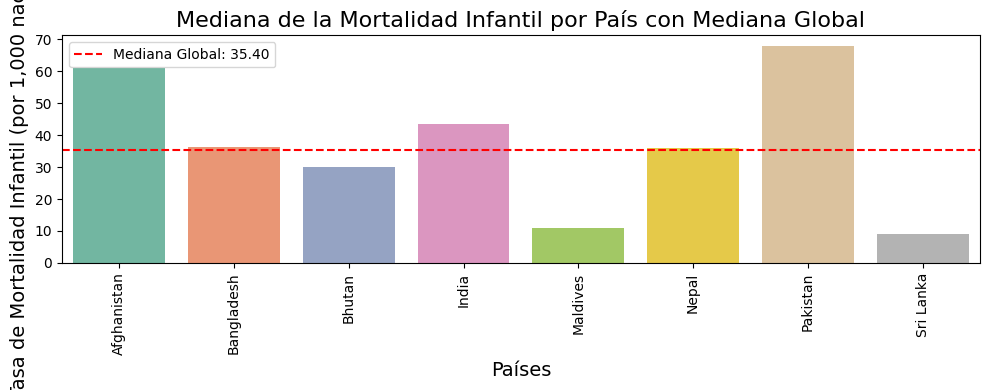

In [23]:

# Calcular la mediana de la tasa de mortalidad infantil para cada país
mortality_median_by_country = df.groupby('Country')['Mortality rate, infant (per 1,000 live births)'].median()

# Calcular la mediana global de mortalidad infantil (considerando todos los países)
global_median = df['Mortality rate, infant (per 1,000 live births)'].median()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 4))

# Crear gráfico de barras para mostrar la mediana de mortalidad infantil por país
sns.barplot(x=mortality_median_by_country.index, y=mortality_median_by_country.values, palette='Set2')

# Agregar una línea para la mediana global
plt.axhline(y=global_median, color='red', linestyle='--', label=f'Mediana Global: {global_median:.2f}')

# Agregar título y etiquetas
plt.title('Mediana de la Mortalidad Infantil por País con Mediana Global', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Tasa de Mortalidad Infantil (por 1,000 nacimientos)', fontsize=14)
plt.xticks(rotation=90)

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Desviación Estándar de la espectativa de vida**

C:\Users\Livi3\AppData\Local\Temp\ipykernel_32376\592531405.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='Life expectancy at birth, total (years)', data=df, palette='Set2')


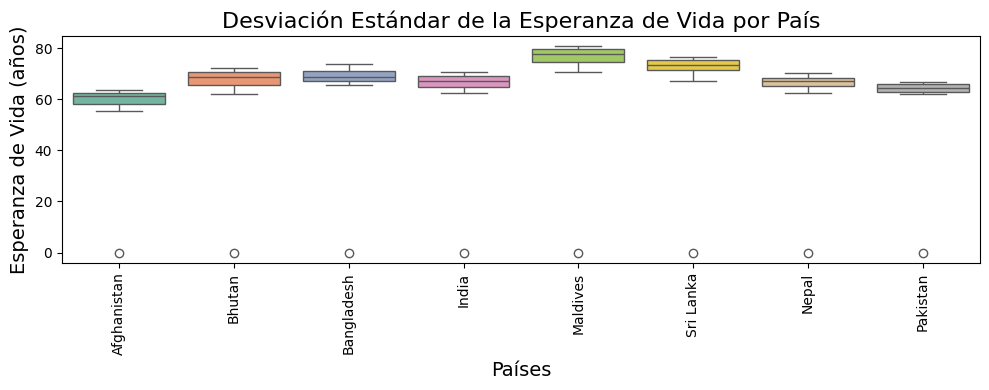

In [24]:

# Calcular la desviación estándar de la esperanza de vida para cada país
life_expectancy_std_by_country = df.groupby('Country')['Life expectancy at birth, total (years)'].std()

# Visualización con gráfico de cajas
plt.figure(figsize=(10, 4))

# Crear un gráfico de cajas para visualizar la desviación estándar de la esperanza de vida por país
sns.boxplot(x='Country', y='Life expectancy at birth, total (years)', data=df, palette='Set2')

# Agregar título y etiquetas
plt.title('Desviación Estándar de la Esperanza de Vida por País', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Esperanza de Vida (años)', fontsize=14)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Desviación Estándar PIB per Cápita**

C:\Users\Livi3\AppData\Local\Temp\ipykernel_32376\4159172680.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gdp_per_capita_std_by_country.index, y=gdp_per_capita_std_by_country.values, palette='Set2')


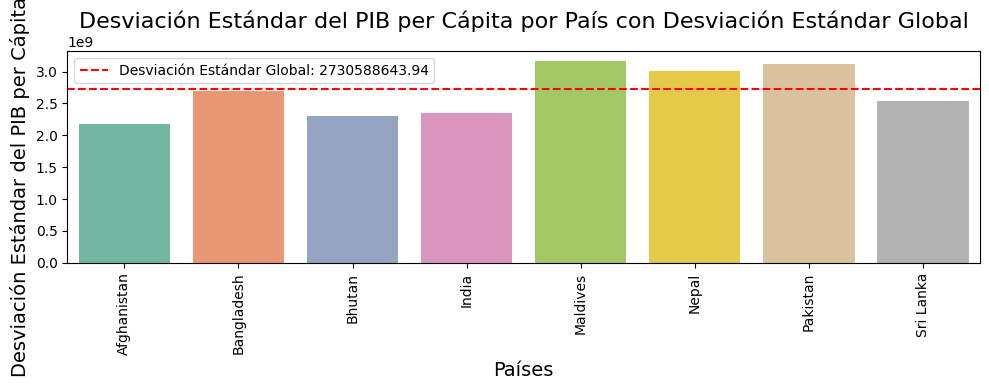

In [25]:

# Calcular la desviación estándar del PIB per cápita para cada país
gdp_per_capita_std_by_country = df.groupby('Country')['GDP per capita (current US$)'].std()

# Calcular la desviación estándar global del PIB per cápita (considerando todos los países)
global_gdp_per_capita_std = df['GDP per capita (current US$)'].std()

# Visualización con gráfico de barras
plt.figure(figsize=(10, 4))

# Crear gráfico de barras para mostrar la desviación estándar del PIB per cápita por país
sns.barplot(x=gdp_per_capita_std_by_country.index, y=gdp_per_capita_std_by_country.values, palette='Set2')

# Agregar una línea para la desviación estándar global
plt.axhline(y=global_gdp_per_capita_std, color='red', linestyle='--', label=f'Desviación Estándar Global: {global_gdp_per_capita_std:.2f}')

# Agregar título y etiquetas
plt.title('Desviación Estándar del PIB per Cápita por País con Desviación Estándar Global', fontsize=16)
plt.xlabel('Países', fontsize=14)
plt.ylabel('Desviación Estándar del PIB per Cápita (US$)', fontsize=14)
plt.xticks(rotation=90)

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Intervalos de confianza por país
El intervalo de confianza indica la precisión de la estimación de la media. Si el intervalo es más estrecho, significa que la estimación es más precisa. Si es más amplio, la estimación es menos precisa.

In [ ]:

# Calcular intervalos de confianza para la media del PIB y desempleo
intervalos_confianza = []

for country in df['Country'].unique():
    subset = df[df['Country'] == country]
    
    if len(subset) > 1:
        mean_gdp = subset['GDP (current US$)'].mean()
        std_gdp = subset['GDP (current US$)'].std()
        n_gdp = len(subset['GDP (current US$)'])
        
        mean_unemployment = subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'].mean()
        std_unemployment = subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'].std()
        n_unemployment = len(subset['Unemployment, total (% of total labor force) (modeled ILO estimate)'])
        
        # Intervalo de confianza del 95%
        ci_gdp = stats.t.interval(0.95, n_gdp-1, loc=mean_gdp, scale=std_gdp/np.sqrt(n_gdp))
        ci_unemployment = stats.t.interval(0.95, n_unemployment-1, loc=mean_unemployment, scale=std_unemployment/np.sqrt(n_unemployment))
        
        intervalos_confianza.append({
            'País': country,
            'IC PIB': ci_gdp,
            'IC Desempleo': ci_unemployment,
        })

# Comparar medias entre India y Sri Lanka
india_data = df[df['Country'] == 'India']['GDP (current US$)']
sri_lanka_data = df[df['Country'] == 'Sri Lanka']['GDP (current US$)']

if len(india_data) > 1 and len(sri_lanka_data) > 1:
    t_statistic_comparison, p_value_comparison = stats.ttest_ind(india_data, sri_lanka_data)
    resultado_comparacion = {
        'Países': 'India vs Sri Lanka',
        'Estadística t': t_statistic_comparison,
        'Valor p': p_value_comparison,
    }
else:
    resultado_comparacion = {
        'Países': 'India vs Sri Lanka',
        'Estadística t': None,
        'Valor p': None,
    }

# Análisis de la  Normalidad

Agrupación de los datos por país y realización de una prueba de normalidad de Shapiro-Wilk para analizar si las variables económicas y sociales siguen una distribución normal en cada país. Ver gráficos Q-Q (Quantile-Quantile) para visualizar la distribución de los datos.

In [61]:

# Agrupar datos por país: en este ejemplo usamos la mortalidad infantil
datos_por_pais = {}
for row in data:
    pais = row['Country']
    if pais not in datos_por_pais:
        datos_por_pais[pais] = {
            'GDP per capita': [],
            'Unemployment': [],
            'Life expectancy': [],
            'Mortality rate': []
        }
    # Agregar PIB per cápita (se asume que ya viene bien formateado)
    try:
        datos_por_pais[pais]['GDP per capita'].append(float(row['GDP per capita (current US$)']))
    except ValueError:
        pass  # Omitir si no se puede convertir

    # Para las demás variables se asume que ya son numéricas o se pueden convertir
    try:
        datos_por_pais[pais]['Unemployment'].append(float(row['Unemployment, total (% of total labor force) (modeled ILO estimate)']))
    except ValueError:
        pass

    try:
        datos_por_pais[pais]['Life expectancy'].append(float(row['Life expectancy at birth, total (years)']))
    except ValueError:
        pass

    # La columna de mortalidad ya se limpió antes
    if 'Mortality rate, infant (per 1,000 live births)' in row:
        datos_por_pais[pais]['Mortality rate'].append(row['Mortality rate, infant (per 1,000 live births)'])

# Lista de variables a evaluar
variables = ['GDP per capita', 'Unemployment', 'Life expectancy', 'Mortality rate']

output_text = ""

# Realizar la prueba de Shapiro-Wilk por país y por variable, filtrando valores no numéricos y NaN
for variable in variables:
    output_text += f'\n📌 Pruebas de normalidad para {variable} por país:\n'
    for pais, datos in datos_por_pais.items():
        # Filtrar solo valores numéricos y que no sean NaN
        data_pais = [x for x in datos[variable] if isinstance(x, (int, float)) and not pd.isna(x)]
        
        # Verificar si hay suficientes datos
        if len(data_pais) < 3:
            output_text += f'   ⚠️ {pais}: Datos insuficientes para evaluar {variable}.\n'
            continue
        
        # Realizar la prueba de Shapiro-Wilk
        try:
            stat, p_value = stats.shapiro(data_pais)
        except Exception as e:
            output_text += f'   ⚠️ {pais}: Error al realizar la prueba para {variable}: {e}\n'
            continue
        
        output_text += f'   🔹 {pais} → Estadística: {stat:.4f}, Valor p: {p_value:.4f}\n'
        
        # Interpretación
        if p_value > 0.05:
            output_text += "      ✅ Los datos parecen seguir una distribución normal.\n"
        else:
            output_text += "      ❌ Los datos **no** siguen una distribución normal.\n"
    output_text += "\n"  # Línea en blanco para separar cada variable

# Mostrar la salida completa en un bloque <pre> para evitar truncamiento
display(HTML(f"<pre>{output_text}</pre>"))

# Guardar la salida completa en un archivo
with open("Normalidad.txt", "w", encoding="utf-8") as f:
    f.write(output_text)
print("Se ha guardado la salida completa en 'Normalidad.txt'.")



Se ha guardado la salida completa en 'Normalidad.txt'.


# Regresión Lineal
Si el valor p del coeficiente de GDP (current US$) es menor que 0.05, se puede concluir que existe una relación estadísticamente significativa entre el PIB y la esperanza de vida.

Si el R-cuadrado es alto (cerca de 1), sugiere que el modelo de regresión lineal explica bien la variabilidad en la esperanza de vida en función del PIB.

La pendiente de la recta de regresión muestra si el PIB tiene un impacto positivo o negativo en la esperanza de vida. Si la pendiente es positiva, significa que a mayor PIB, mayor esperanza de vida, y viceversa si es negativa.

                                       OLS Regression Results                                      
Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                     -17.809
Model:                                                 OLS   Adj. R-squared:                -17.809
Method:                                      Least Squares   F-statistic:                       nan
Date:                                     Sat, 01 Feb 2025   Prob (F-statistic):                nan
Time:                                             16:29:51   Log-Likelihood:                -1069.4
No. Observations:                                      192   AIC:                             2141.
Df Residuals:                                          191   BIC:                             2144.
Df Model:                                                0                                         
Covariance Type:                                 nonrobust                                         


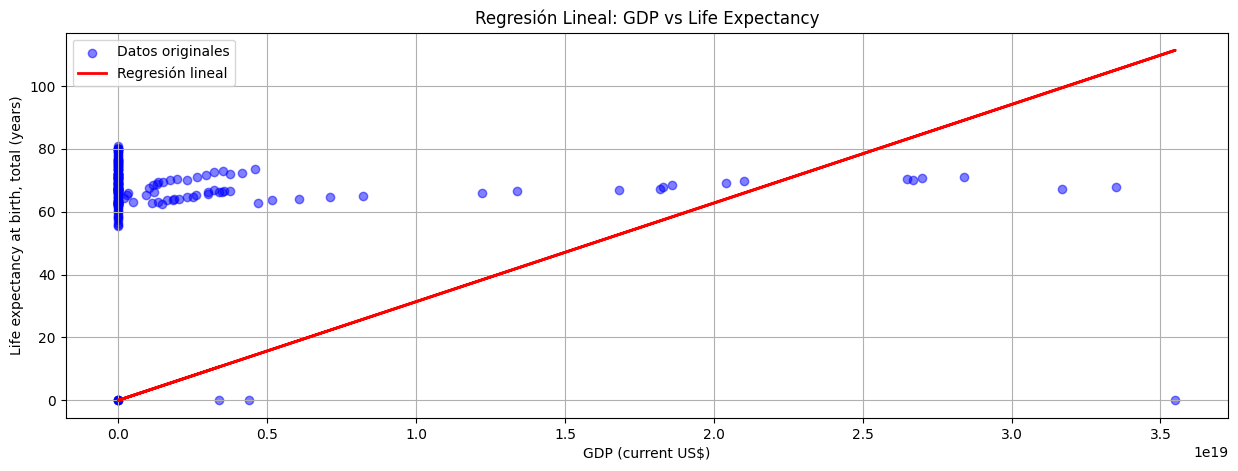

In [ ]:

# Regresión Lineal
# Convertir la columna de GDP a numérico, eliminando comas si las hubiera
df['GDP (current US$)'] = pd.to_numeric(
    df['GDP (current US$)'].astype(str).str.replace(',', ''), 
    errors='coerce'
)

# Convertir la columna de Life expectancy a numérico 
df['Life expectancy at birth, total (years)'] = pd.to_numeric(
    df['Life expectancy at birth, total (years)'], 
    errors='coerce'
)

X = df['GDP (current US$)']  # Variable independiente (X)
y = df['Life expectancy at birth, total (years)']  # Variable dependiente (y)

# Añadir una constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X, missing='drop')  # missing='drop' elimina los valores NaN
results = model.fit()

# Mostrar los resultados del modelo de regresión lineal
print(results.summary())

# Graficar la regresión lineal
plt.figure(figsize=(15, 5))
plt.scatter(X['GDP (current US$)'], y, label='Datos originales', color='blue', alpha=0.5)
plt.plot(X['GDP (current US$)'], results.fittedvalues, label='Regresión lineal', color='red', linewidth=2)
plt.xlabel('GDP (current US$)')
plt.ylabel('Life expectancy at birth, total (years)')
plt.title('Regresión Lineal: GDP vs Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


# ANOVA
Si p_value < 0.05: Se puede concluir que las medias del PIB entre los diferentes países son significativamente diferentes, lo que sugiere que el PIB varía considerablemente entre los países analizados.

Si p_value >= 0.05: Se puede concluir que no hay evidencia suficiente para afirmar que las medias del PIB entre los países sean diferentes, lo que indica que, en promedio, el PIB de los países podría ser similar.

In [70]:

# Realizar ANOVA
groups = df.groupby('Country')['GDP (current US$)'].apply(list)

# Realizar la prueba ANOVA
f_stat, p_value = stats.f_oneway(*groups)

# Imprimir los resultados
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpretación del p-value
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")



F-statistic: 45.5920344725877
p-value: 5.349716564521787e-37
Hay diferencias significativas entre los grupos.


# Pruebas de Hipótesis

In [71]:

# Agrupar datos por país: se almacenarán los valores de mortalidad infantil
datos_por_pais = {}
for row in data:
    pais = row['Country']
    if pais not in datos_por_pais:
        datos_por_pais[pais] = []
    # Asegurarse de que solo se agreguen valores válidos
    if 'Mortality rate, infant (per 1,000 live births)' in row and isinstance(row['Mortality rate, infant (per 1,000 live births)'], float):
        datos_por_pais[pais].append(row['Mortality rate, infant (per 1,000 live births)'])

# Valor hipotético para la tasa de mortalidad infantil
valor_hipotetico = 30
alpha = 0.05

output_text = ""

# Realizar la prueba t de una muestra para cada país y guardar la salida en output_text
for pais, mortalidad in datos_por_pais.items():
    if len(mortalidad) > 0:  # Verificar que hay datos suficientes
        t_stat, p_value = stats.ttest_1samp(mortalidad, valor_hipotetico)
        
        # Ajustar el valor p para una prueba unilateral (detectando si la media es menor o mayor)
        p_value_unilateral = p_value / 2 if t_stat < 0 else 1 - p_value / 2
        
        output_text += f"País: {pais}\n"
        output_text += f"  t-statistic: {t_stat:.4f}, p-value (unilateral): {p_value_unilateral:.4f}\n"
        if p_value_unilateral < alpha:
            if t_stat < 0:
                output_text += f"  Conclusión: La tasa de mortalidad infantil en {pais} es significativamente menor que {valor_hipotetico}.\n"
            else:
                output_text += f"  Conclusión: La tasa de mortalidad infantil en {pais} es significativamente mayor que {valor_hipotetico}.\n"
        else:
            output_text += f"  Conclusión: No se encontró diferencia significativa entre la tasa de mortalidad infantil en {pais} y {valor_hipotetico}.\n"
        output_text += "-" * 50 + "\n"

# Mostrar la salida completa en un bloque <pre> para evitar truncamiento
display(HTML(f"<pre>{output_text}</pre>"))

# Opcional: guardar la salida completa en un archivo para revisarla externamente
with open("Pruebas_Hipotesis.txt", "w", encoding="utf-8") as f:
    f.write(output_text)
print("Se ha guardado la salida completa en 'Pruebas_Hipotesis.txt'.")


Se ha guardado la salida completa en 'Pruebas_Hipotesis.txt'.



Resultados de Pruebas de Hipótesis:
Comparación PIB vs Esperanza de Vida - Prueba U de Mann-Whitney: Estadístico = 3885.5000, Valor p = 0.0607
Relación Desempleo vs PIB - Correlación de Pearson: Coeficiente = -0.0515, Valor p = 0.4784
Comparación Mortalidad Infantil vs PIB per cápita - Prueba U de Mann-Whitney: Estadístico = 4147.5000, Valor p = 0.2321


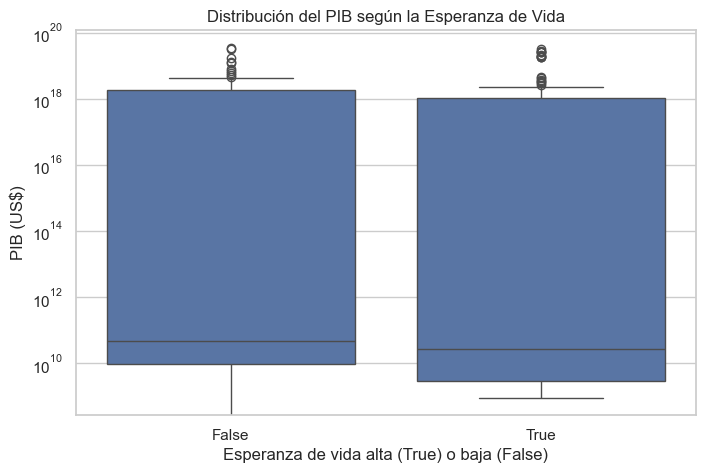

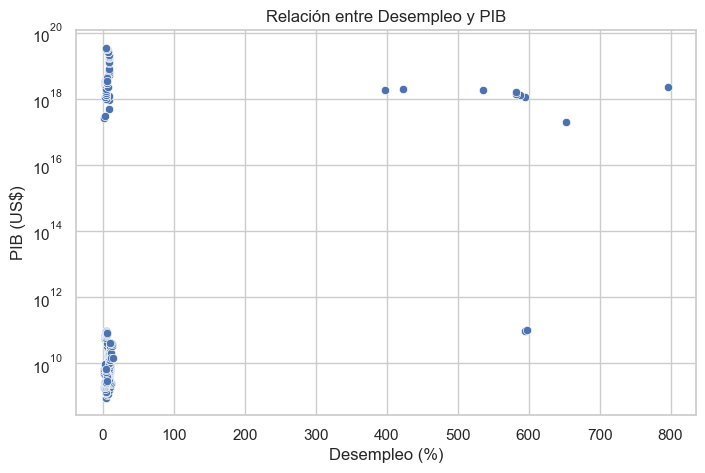

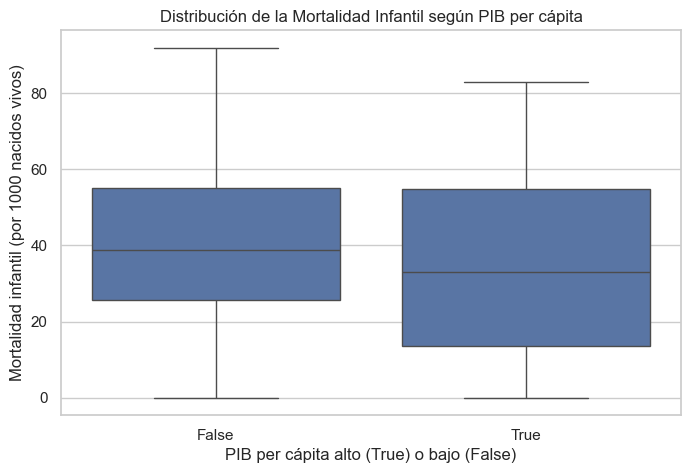

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar los datos
df = pd.read_csv("Asiaticos.csv")

# Limpieza de datos
def clean_numeric(column):
    return pd.to_numeric(column.astype(str).str.replace("[,.]", "", regex=True), errors='coerce')

df["GDP (current US$)"] = clean_numeric(df["GDP (current US$)"])
df["GDP per capita (current US$)"] = clean_numeric(df["GDP per capita (current US$)"])
df["Population growth (annual %)"] = clean_numeric(df["Population growth (annual %)"])

# Hipótesis 1: Diferencia de PIB entre países con alta y baja esperanza de vida
life_expectancy_median = df["Life expectancy at birth, total (years)"].median()
high_life_expectancy = df[df["Life expectancy at birth, total (years)"] >= life_expectancy_median]["GDP (current US$)"]
low_life_expectancy = df[df["Life expectancy at birth, total (years)"] < life_expectancy_median]["GDP (current US$)"]

# Verificamos normalidad
p_high = stats.shapiro(high_life_expectancy)[1]
p_low = stats.shapiro(low_life_expectancy)[1]

# Selección de prueba
if p_high > 0.05 and p_low > 0.05:
    t_stat, p_value = stats.ttest_ind(high_life_expectancy, low_life_expectancy, equal_var=False)
    test_used = "Prueba t de Student"
else:
    t_stat, p_value = stats.mannwhitneyu(high_life_expectancy, low_life_expectancy, alternative="two-sided")
    test_used = "Prueba U de Mann-Whitney"

# Hipótesis 2: Correlación entre desempleo y PIB
corr_coef, p_corr = stats.pearsonr(df["Unemployment, total (% of total labor force) (modeled ILO estimate)"], df["GDP (current US$)"])

# Hipótesis 3: Relación entre PIB per cápita y mortalidad infantil
gdp_per_capita_median = df["GDP per capita (current US$)"].median()
high_gdp_per_capita = df[df["GDP per capita (current US$)"] >= gdp_per_capita_median]["Mortality rate, infant (per 1,000 live births)"]
low_gdp_per_capita = df[df["GDP per capita (current US$)"] < gdp_per_capita_median]["Mortality rate, infant (per 1,000 live births)"]

# Verificamos normalidad
p_high_mortality = stats.shapiro(high_gdp_per_capita)[1]
p_low_mortality = stats.shapiro(low_gdp_per_capita)[1]

# Selección de prueba
if p_high_mortality > 0.05 and p_low_mortality > 0.05:
    t_mortality, p_mortality = stats.ttest_ind(high_gdp_per_capita, low_gdp_per_capita, equal_var=False)
    mortality_test_used = "Prueba t de Student"
else:
    t_mortality, p_mortality = stats.mannwhitneyu(high_gdp_per_capita, low_gdp_per_capita, alternative="two-sided")
    mortality_test_used = "Prueba U de Mann-Whitney"

# Resultados de pruebas de hipótesis
print("\nResultados de Pruebas de Hipótesis:")
print(f"Comparación PIB vs Esperanza de Vida - {test_used}: Estadístico = {t_stat:.4f}, Valor p = {p_value:.4f}")
print(f"Relación Desempleo vs PIB - Correlación de Pearson: Coeficiente = {corr_coef:.4f}, Valor p = {p_corr:.4f}")
print(f"Comparación Mortalidad Infantil vs PIB per cápita - {mortality_test_used}: Estadístico = {t_mortality:.4f}, Valor p = {p_mortality:.4f}")


# Gráficos
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Life expectancy at birth, total (years)"] >= life_expectancy_median, 
            y=df["GDP (current US$)"])
plt.xlabel("Esperanza de vida alta (True) o baja (False)")
plt.ylabel("PIB (US$)")
plt.title("Distribución del PIB según la Esperanza de Vida")
plt.yscale("log")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Unemployment, total (% of total labor force) (modeled ILO estimate)"],
                y=df["GDP (current US$)"])
plt.xlabel("Desempleo (%)")
plt.ylabel("PIB (US$)")
plt.title("Relación entre Desempleo y PIB")
plt.yscale("log")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["GDP per capita (current US$)"] >= gdp_per_capita_median, 
            y=df["Mortality rate, infant (per 1,000 live births)"])
plt.xlabel("PIB per cápita alto (True) o bajo (False)")
plt.ylabel("Mortalidad infantil (por 1000 nacidos vivos)")
plt.title("Distribución de la Mortalidad Infantil según PIB per cápita")
plt.show()


# Interpretación de los Resultados

## Comparación del PIB según la esperanza de vida

- En el primer gráfico, se observa que los países con una mayor esperanza de vida tienden a tener un PIB más alto.
- La diferencia entre los grupos no es estadísticamente significativa (*p > 0.05*), pero visualmente parece haber una tendencia.

## Relación entre desempleo y PIB

- En el segundo gráfico, la dispersión de los puntos muestra que no hay una relación clara entre la tasa de desempleo y el PIB.
- El coeficiente de correlación de Pearson es cercano a 0 (*-0.051*), lo que sugiere que no hay una relación lineal fuerte entre ambas variables.

## Comparación de la Mortalidad Infantil según el PIB per cápita

- En el tercer gráfico, se observa que los países con un PIB per cápita más alto tienden a tener una menor tasa de mortalidad infantil.
- Sin embargo, la diferencia entre los grupos no fue estadísticamente significativa (*p > 0.05*), lo que sugiere que otros factores pueden estar influyendo en la mortalidad infantil más allá del PIB per cápita.


# Matriz de Correlación y Mapa de Calor

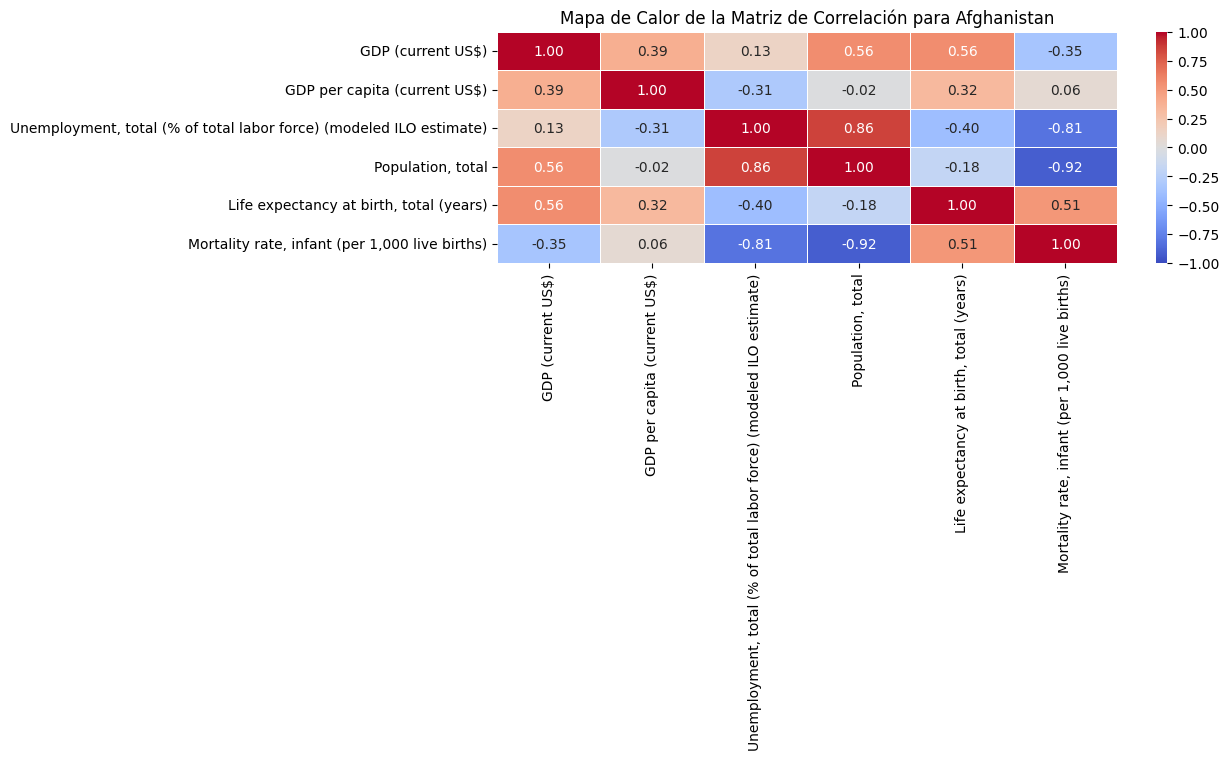

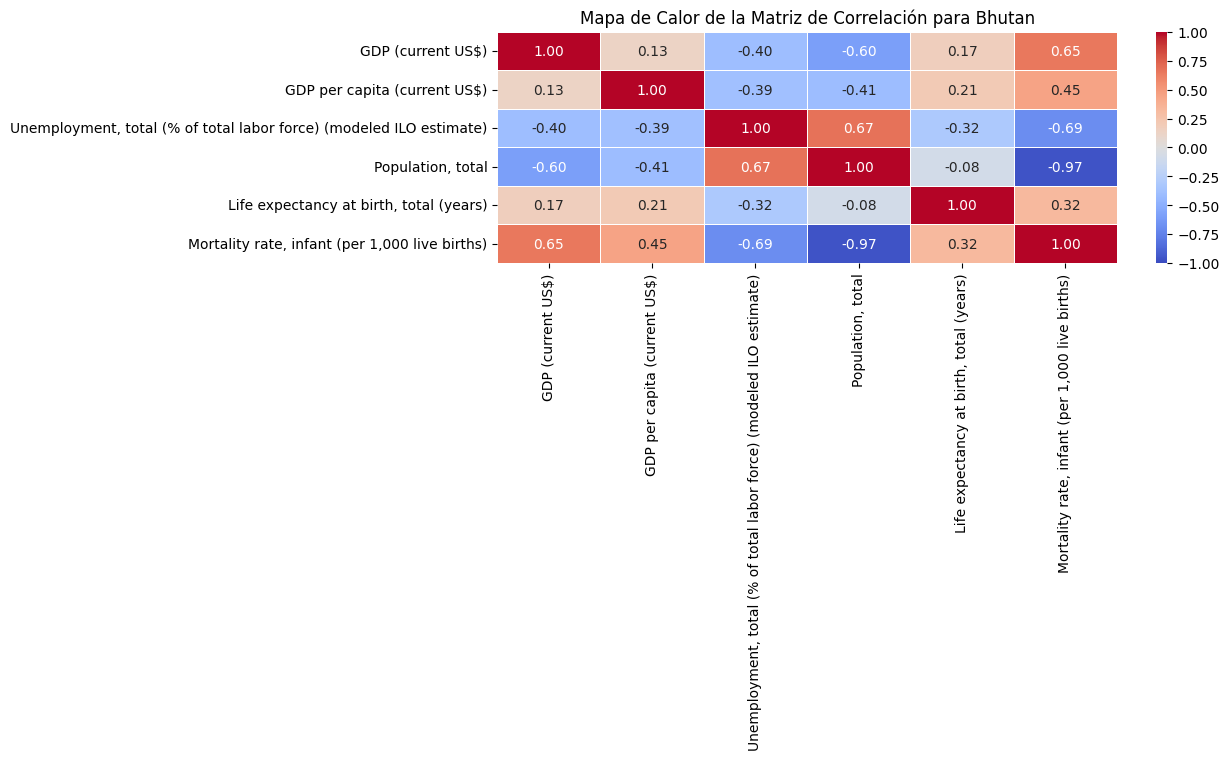

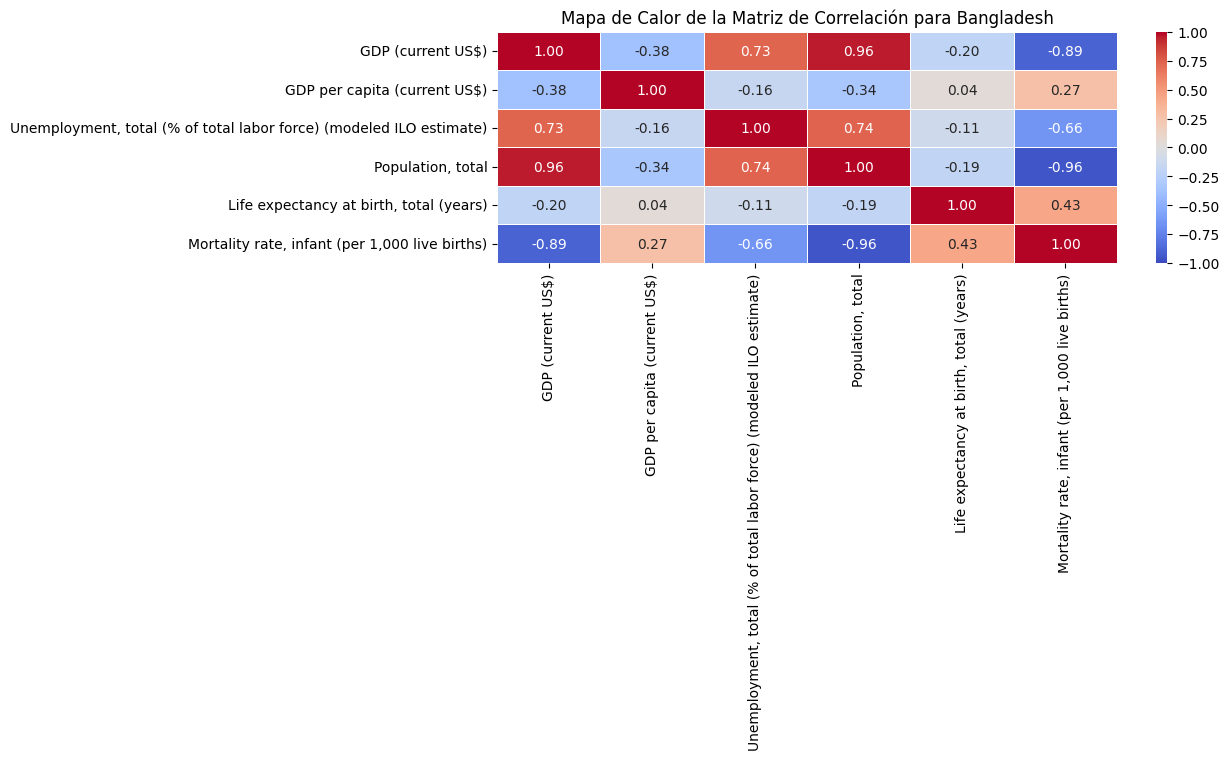

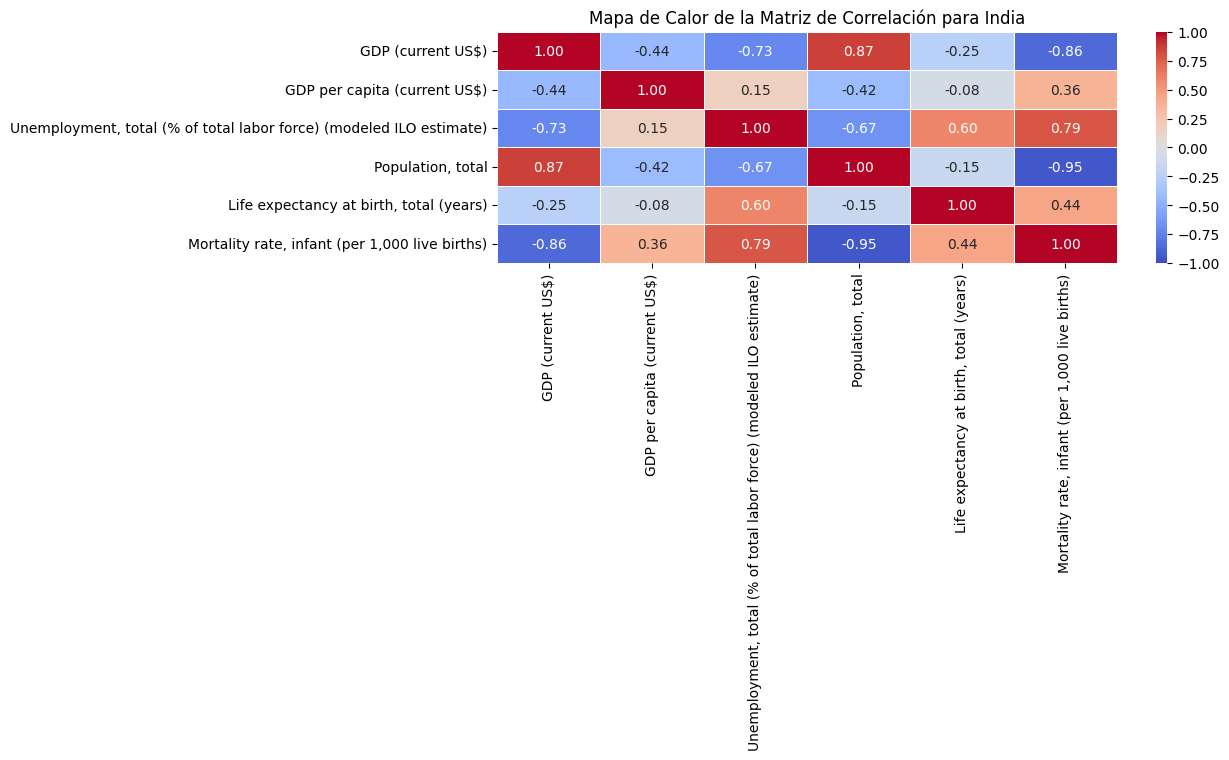

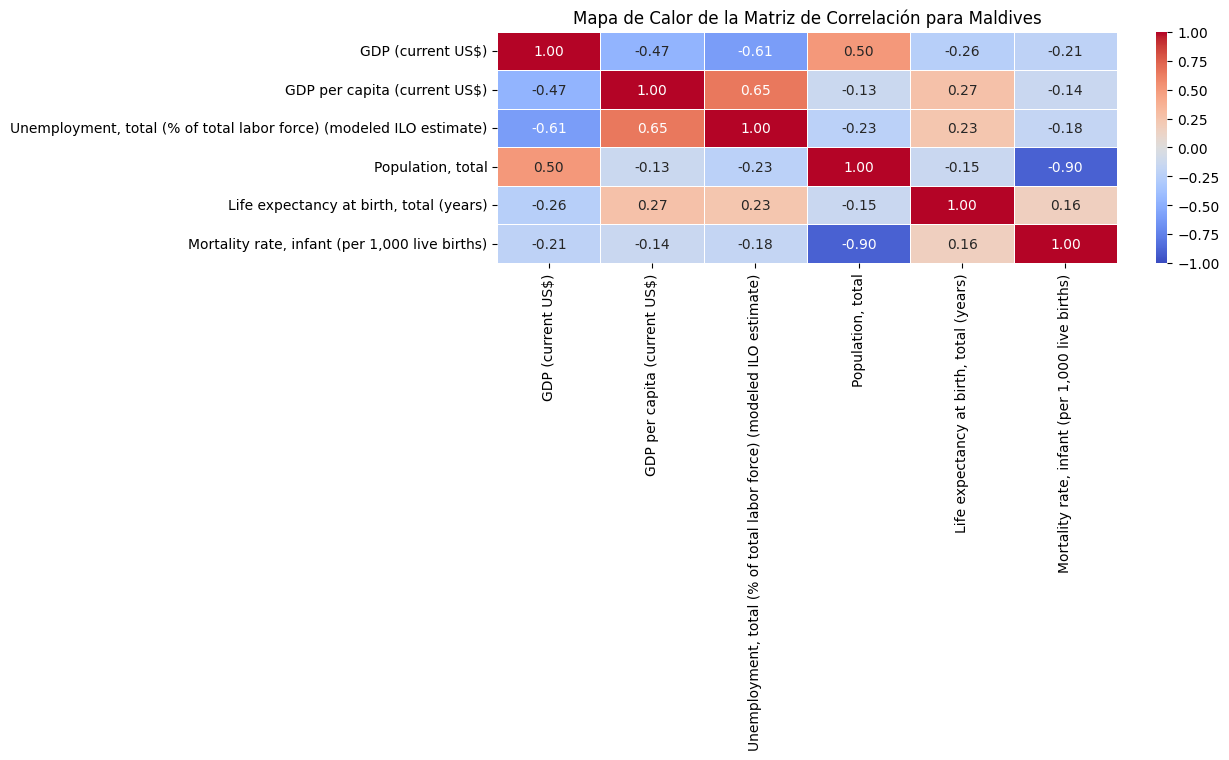

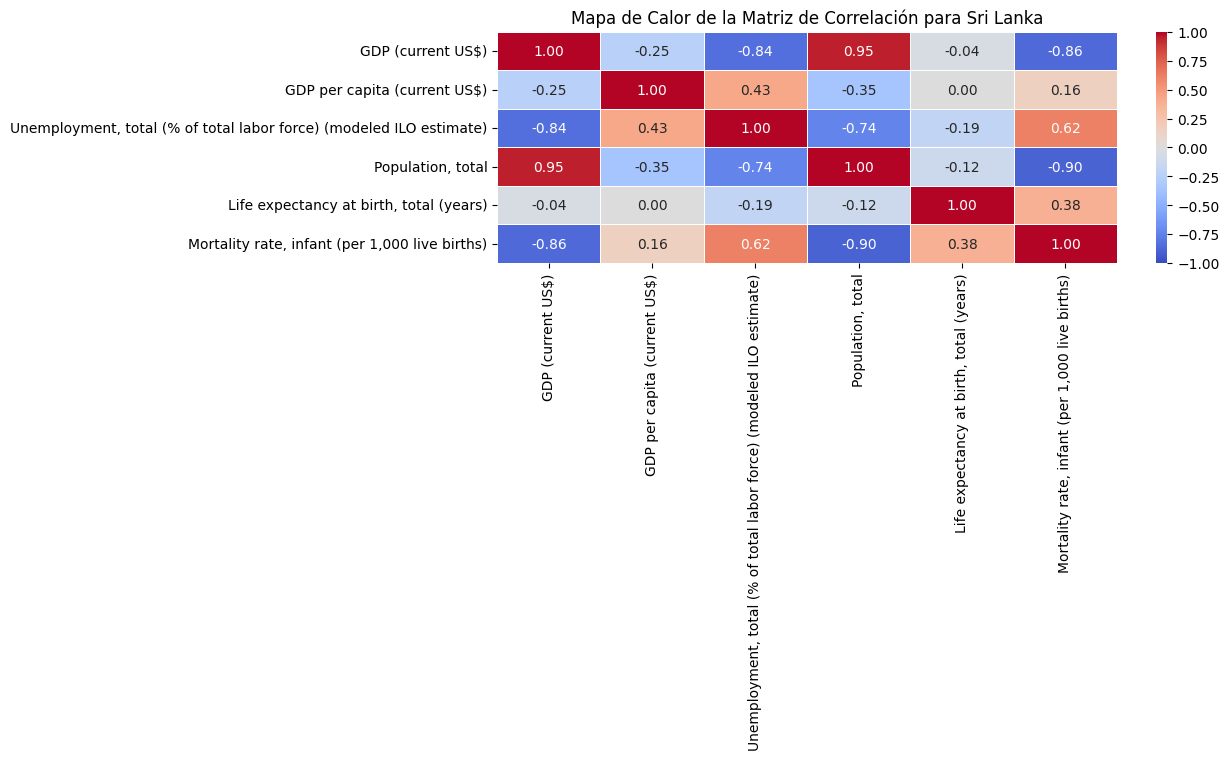

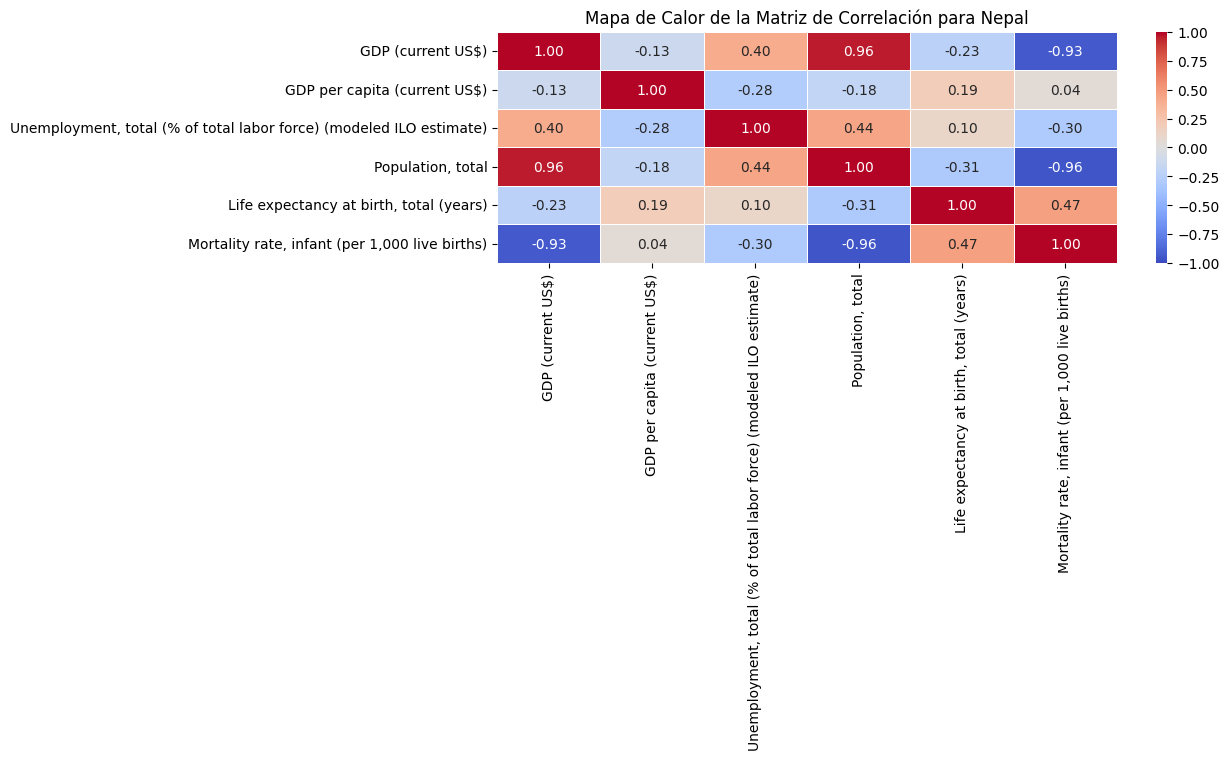

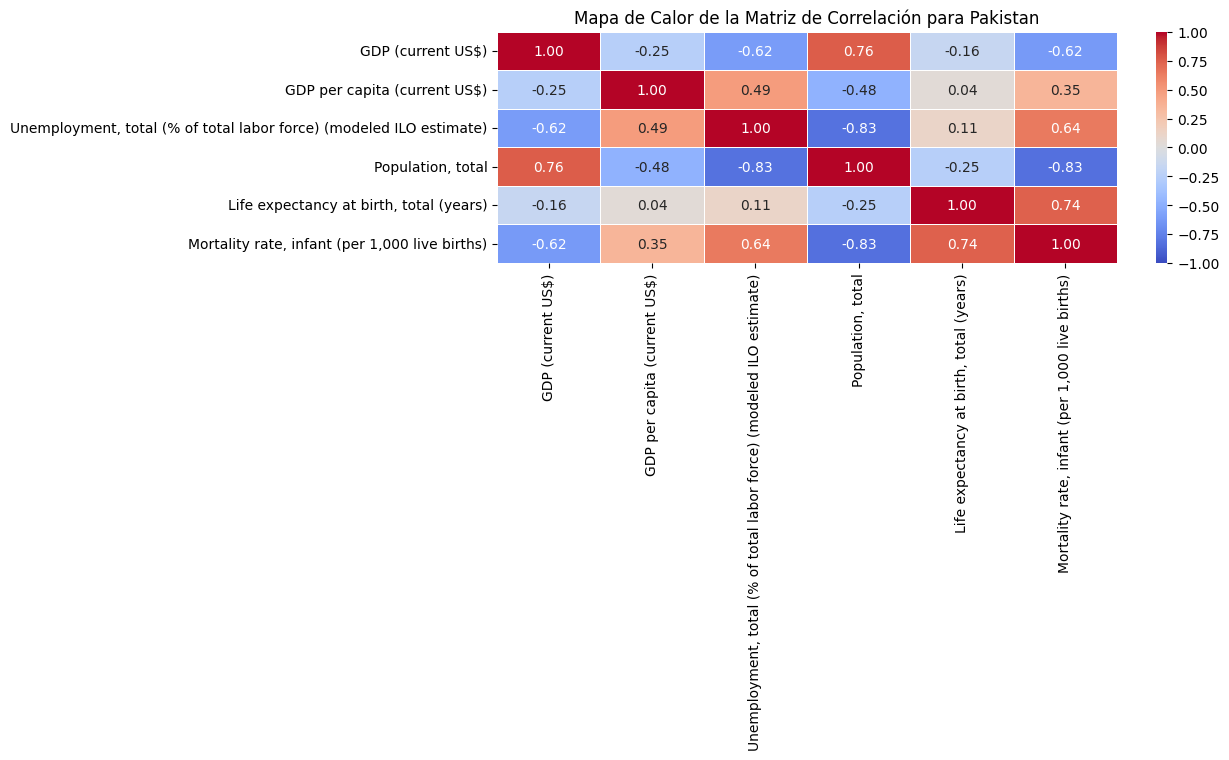

In [72]:

# Lista de variables numéricas
variables = ['GDP (current US$)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Population, total', 'Life expectancy at birth, total (years)', 'Mortality rate, infant (per 1,000 live births)']

# Calcular la matriz de correlación por país y mostrar mapas de calor
for country in df['Country'].unique():
    df_pais = df[df['Country'] == country]
    
    # Verificar si el DataFrame tiene suficientes datos numéricos
    if df_pais[variables].shape[0] > 1:  # Más de una fila de datos
        df_pais_numerico = df_pais[variables]
        matriz_correlacion = df_pais_numerico.corr()

        # Generar mapa de calor
        plt.figure(figsize=(10, 3))
        sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
        plt.title(f'Mapa de Calor de la Matriz de Correlación para {country}')
        plt.show()
    else:
        print(f"No hay suficientes datos numéricos para {country}.")



# Regresión Múltiple
Vamos a usar la regresión múltiple para analizar cómo el Producto Interno Bruto (PIB), el desempleo y otras variables pueden afectar a la esperanza de vida al nacer.

In [73]:

# Definir las variables dependientes e independientes
X = df[['GDP (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)', 'Population, total']]  # Variables independientes
y = df['Life expectancy at birth, total (years)']  # Variable dependiente

# Añadir una constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión múltiple
model = sm.OLS(y, X, missing='drop')  # missing='drop' elimina los valores NaN
results = model.fit()

# Mostrar los resultados del modelo de regresión
print(results.summary())


                                       OLS Regression Results                                      
Dep. Variable:     Life expectancy at birth, total (years)   R-squared:                     -15.683
Model:                                                 OLS   Adj. R-squared:                -15.771
Method:                                      Least Squares   F-statistic:                    -178.6
Date:                                     Sat, 01 Feb 2025   Prob (F-statistic):               1.00
Time:                                             16:30:53   Log-Likelihood:                -1057.9
No. Observations:                                      192   AIC:                             2120.
Df Residuals:                                          190   BIC:                             2126.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


# Conclusiones

En este proyecto se realizaron diversas pruebas estadísticas para evaluar la distribución de las variables clave en países asiáticos, incluyendo pruebas de normalidad (Shapiro-Wilk) para el PIB per cápita, la tasa de desempleo, la esperanza de vida y la tasa de mortalidad infantil; además, se implementaron análisis de regresión lineal y múltiple, junto con una prueba ANOVA, para determinar la relación entre el PIB, el desempleo, la población y la esperanza de vida.

Los resultados indican que la mayoría de las variables, en especial la esperanza de vida, no siguen una distribución normal, y que la tasa de desempleo presenta comportamientos heterogéneos entre países. La regresión lineal mostró un efecto positivo del PIB sobre la esperanza de vida. Por otro lado, el análisis ANOVA reveló diferencias significativas en el PIB entre los países, y en la regresión múltiple se encontró que el desempleo y la población tienen un impacto más consistente en la esperanza de vida.

En conjunto, los hallazgos subrayan la complejidad de las interacciones entre los indicadores económicos y sociales en Asia. Se evidencia la necesidad de ampliar la base de datos y aplicar métodos robustos para abordar la falta de normalidad. Estos resultados invitan a profundizar en el análisis con enfoques analíticos avanzados que permitan comprender mejor las disparidades económicas y el impacto de las políticas laborales en la salud y el bienestar de la región.